# Description of Dataset

KneeMRI dataset was gathered retrospectively from exam records made on a Siemens Avanto 1.5T MR scanner, and obtained by proton density-weighted fat suppression technique at the Clinical Hospital Centre Rijeka, Croatia, from 2006 until 2014. The dataset consists of 917 12-bit grayscale volumes of either left or right knees. Each volume record was assigned a diagnosis concerning the condition of the anterior cruciate ligament in a double-blind fashion, i.e. each volume record was labelled according to the ligament condition: (1) healthy, (2) partially injured, or (3) completely ruptured. A wider rectangular region of interest (ROI) was manually extracted from the original volumes and is also annotated. For more details regarding the dataset, the reader is referred to the paper stated under the "acknowledging source" section of this webpage.
This dataset was built with the intention of providing scientists, involved with machine vision and/or machine learning, an easy way of working with the data.

## ${\textbf{Libraries}}$

In [ ]:
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from tensorflow import keras
from keras import Sequential
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import os
import glob
import csv

Mounted at /content/drive


In [ ]:
dir = '/content/drive/MyDrive/knee_injury_machine_learning (1)/knee_injury_machine_learning'

## ${\textbf{Import Data}}$

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Cleaned/combined.csv', index_col = 0)
#df_segmentation = pd.read_csv('/content/drive/MyDrive/Time frequency plots/signal_1.csv', index_col = 0)

## ${\textbf{Data Exploration}}$

In [ ]:
data
#df_segmentation.tail()
#data.head()
dat=data.reset_index()
dat

,0.037449,0.014427,-0.029719,0.027526,-0.011311,0.023839,-0.05696,0.0072665,-0.0070971,0.022859,...,0.0077038,0.062238,0.069556,0.055189,-0.0013524,-0.047032,-0.0025456,0.004087,3.9529e-16,3.9493e-17
0,0.086892,-0.097257,0.057470,0.048388,-0.019459,0.019015,0.003854,-0.010892,0.019054,-0.048814,...,0.039331,0.017530,0.036967,-0.008958,0.001510,-0.033379,-0.036817,-0.074751,-9.876200e-16,-6.049300e-16
1,0.008366,-0.001604,-0.004283,0.006565,-0.005514,0.000825,0.001016,-0.006337,0.007053,-0.001491,...,0.020223,0.019823,-0.018966,0.000516,-0.006822,-0.014493,0.020983,0.995030,-4.645800e-16,7.456000e-16
2,0.082608,-0.025120,-0.002183,0.064826,-0.019850,-0.026136,-0.024578,0.046544,-0.002155,0.100280,...,0.089893,-0.011685,0.023288,0.037153,0.040572,0.030129,-0.022848,-0.001895,-1.452800e-16,-3.027800e-16
3,0.177020,-0.035542,-0.205940,0.054155,-0.114340,0.449900,-0.463020,-0.080098,-0.374560,-0.356530,...,0.005408,0.016120,-0.014172,0.000868,-0.023217,-0.000179,-0.000188,0.000917,-2.153400e-16,3.967600e-17
4,0.055287,0.010984,0.009663,0.044501,0.013978,0.029866,0.008610,0.019813,0.014504,0.044228,...,0.014505,0.004882,0.024279,-0.002944,-0.028774,0.016234,-0.001079,-0.004111,-2.325000e-16,4.702400e-17
5,0.021773,0.006380,-0.020979,0.038993,-0.007145,0.005269,-0.018933,0.012243,-0.000469,0.017434,...,0.185290,-0.012014,-0.046950,-0.037072,0.028164,-0.007757,-0.026020,-0.024139,2.253100e-16,2.960000e-16
6,0.039089,0.002885,-0.009826,0.031448,-0.004827,-0.004009,-0.015486,-0.002729,0.015285,0.021814,...,-0.149340,0.736440,-0.094753,-0.361660,0.123010,0.042720,-0.067548,-0.015869,-7.576000e-17,3.334900e-16
7,0.106710,-0.013387,0.002385,0.057849,0.034360,-0.030823,-0.031926,0.019431,0.036200,0.010260,...,0.025645,-0.027618,-0.015384,-0.011645,-0.010999,0.018213,0.016056,-0.003987,-3.886700e-16,3.306600e-17
8,0.070070,-0.021378,-0.043552,0.031644,-0.018251,0.027826,-0.055733,0.010202,0.060627,0.055543,...,-0.030429,0.003169,0.006895,-0.004466,0.005314,-0.014795,-0.012582,-0.002504,-9.273500e-16,-1.546400e-17
9,0.100560,-0.018782,-0.069160,0.019467,-0.034171,0.062022,-0.081910,-0.007609,0.048924,0.091743,...,0.038969,-0.026150,0.022115,-0.007461,0.020864,-0.018301,-0.003122,-0.007286,-5.382000e-16,1.000400e-16


In [ ]:
dt_new = data.sum(axis=0)
dt_new.head(40)

0.1     2.206909
0.2     2.008795
0.3     2.013781
0.4     1.788255
0.5     1.893807
0.6     1.935922
0.7     2.076535
0.8     2.002003
0.9     2.041512
0.10    0.520354
0.11    0.283750
0.12    0.122650
0.13    0.316556
0.14    0.319300
0.15    0.160670
0.16    0.372929
0.17    0.388296
0.18    0.664862
0.19    0.863116
0.20    0.870013
0.21    2.165110
0.22    2.170840
0.23    2.022678
0.24    2.019321
0.25    2.015420
0.26    2.184030
0.27    2.173700
0.28    1.963710
0.29    0.178872
0.30    0.270860
0.31    0.127690
0.32    0.118670
0.33    0.232940
0.34    0.211491
0.35    0.474979
0.36    0.262714
0.37    0.323165
0.38    0.222748
0.39    0.378027
0.40    0.265046
dtype: float64

In [ ]:
    # Doing preprocessing
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(dat)
scaled_data = scaler.transform(dat)

    #Doing PCA

#from sklearn.decomposition import PCA
#pca = PCA(n_components=0.70)
#pca.fit(scaled_data)
#x_pca=pca.fit_transform(scaled_data)
x_new=pd.DataFrame(scaled_data)

In [ ]:
data.drop(data.loc[data.sum(axis=1)==0].index, inplace=True)
#data.drop(columns=data.columns[data.sum()==0], inplace=True)
data_new = data.reset_index()
#data_new.drop('index', axis=1, inplace=True)
data_new

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.266,0.267,0.268,0.269,0.270,0.271,0.272,0.273,0.274,0.275
0,1.448600,1.448600,1.448600,1.453700,1.468200,1.483200,1.498200,1.513200,1.528300,1.544200,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.240730,0.131200,0.131200,0.131200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.083474,0.086228,0.088706,0.089256,0.089256,0.089256,0.089256,0.089256,0.089256,0.089256
2,0.209330,0.209330,0.209790,0.211830,0.214100,0.341560,0.349630,0.357780,0.366370,0.375130,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.060256,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.046984,0.050062,0.053140,0.056219,0.057758,0.057758,0.057758,0.057758,0.057758,0.057758
4,0.108810,0.108810,0.108810,0.108810,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.035345,0.036704,0.037996,0.039289,0.040322,0.040452,0.040452,0.040452,0.040452,0.040452
5,0.032863,0.032863,0.032863,0.032863,0.032863,0.037953,0.048133,0.058312,0.069165,0.082375,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.020481,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110800,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.175210,0.000000,0.000000,0.000000,0.000000,0.031094,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.018366,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.089866,0.089866,0.000000,0.000000,0.000000,0.000000,0.033966,0.036443,0.038168,0.039807,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.186760,0.186240,0.077532,0.075378,0.073092,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
x_new

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,-0.755903,1.387821,0.378966,2.492335,-0.687714,0.131411,0.645112,-0.389734,-0.085481,1.884376,...,-0.725123,-0.850214,0.127047,-0.231581,-0.409839,0.405114,0.245333,0.367071,0.546222,-0.154761
1,-1.346228,-0.487416,-0.125621,0.290461,-0.299230,-0.350334,0.073887,0.779837,-0.432133,0.129122,...,-0.131828,-0.404274,-0.071961,-0.109577,-0.172315,-0.052647,0.016464,0.090496,0.218052,0.117985
2,0.003729,-1.421690,1.790581,-0.820494,-2.072816,1.436377,-2.023932,0.235847,-1.472118,-0.450068,...,-1.278948,-0.069026,1.251314,-0.848292,0.124758,0.266309,1.265752,0.403025,0.254599,0.134734
3,1.030271,0.227213,-0.236879,0.231756,0.014083,0.493955,-0.232376,-0.009208,0.071049,0.278020,...,-0.214482,0.247675,0.199662,0.333191,0.249435,0.247344,-0.468779,0.433930,-1.701191,0.561238
4,-0.604753,-0.568700,-0.062433,-0.733175,-0.387900,0.252658,-0.189863,0.134326,-1.748996,-0.155524,...,-0.034824,-0.086860,0.060857,-0.166047,0.061745,-0.032554,0.453554,0.228183,-0.058466,-0.131028
5,-1.171269,-0.569654,1.462926,0.345020,-0.652188,0.110311,0.577098,0.196578,0.174596,1.220429,...,0.094726,0.981641,0.183411,0.999042,5.990391,-1.542561,-1.434246,0.255596,0.862837,0.314123
6,-1.081607,0.114502,0.109279,-0.404419,-0.101582,-0.080185,-0.251262,0.818820,-0.120590,-0.217691,...,-0.468703,-0.721383,-2.325664,-0.003905,0.817394,-1.521234,1.017173,0.187928,-0.799617,0.648742
7,0.122090,-0.416116,0.480718,0.310479,0.588951,-0.023520,0.498534,0.089107,0.125859,0.265546,...,3.396294,-1.614120,-1.992394,0.840296,-0.241304,0.306003,-0.178286,-0.739057,0.290107,0.045838
8,-0.370716,-0.636674,0.160449,4.109834,1.303438,-0.979986,1.451649,1.277934,2.790503,-1.295452,...,-0.071465,-0.496870,-0.189580,-0.132777,-0.209927,-0.196141,0.090466,-0.120629,-0.216289,0.060972
9,0.097357,-0.799412,-0.023053,0.851201,-0.134497,-1.182665,-0.519415,-1.989363,0.513429,-0.178912,...,-0.662064,0.515282,0.620339,0.005513,0.278156,0.333863,0.604909,0.055001,-0.688305,0.057273


In [ ]:
df_segmentation

,kneeLR,roiX,roiY,roiZ,roiHeight,roiWidth,roiDepth,aclDiagnosis
examId,,,,,,,,
329637,1,139,184,14,74,72,3,0
390116,0,113,105,10,83,98,6,0
404663,1,120,117,15,101,115,2,1
406320,0,117,124,12,91,80,3,0
412857,1,122,105,14,83,98,4,0
...,...,...,...,...,...,...,...,...
1027212,1,113,127,16,101,99,3,1
1028019,1,105,102,14,95,100,3,1
1028028,0,118,84,15,100,100,2,0


In [ ]:
dat.describe()

,0.037449,0.014427,-0.029719,0.027526,-0.011311,0.023839,-0.05696,0.0072665,-0.0070971,0.022859,...,0.0077038,0.062238,0.069556,0.055189,-0.0013524,-0.047032,-0.0025456,0.004087,3.9529e-16,3.9493e-17
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,...,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,5.400000e+01,5.400000e+01
mean,0.106371,0.011173,-0.008199,0.036327,-0.001834,0.012691,-0.017922,0.013140,0.012911,0.016524,...,0.010135,0.002289,-0.000609,0.008167,0.012972,0.002771,0.010898,0.014762,-9.699056e-17,5.253221e-18
std,0.085516,0.136882,0.137050,0.132323,0.137339,0.136722,0.135939,0.136715,0.136737,0.136308,...,0.136975,0.137075,0.137026,0.136903,0.136735,0.137180,0.136919,0.136549,1.373602e-01,1.373602e-01
min,0.008366,-0.437610,-0.270820,-0.436470,-0.445990,-0.476430,-0.463020,-0.491050,-0.374560,-0.525100,...,-0.381350,-0.502390,-0.188160,-0.361660,-0.352400,-0.565620,-0.103260,-0.074751,-7.070900e-01,-7.070900e-01
25%,0.049408,-0.020729,-0.043245,0.020886,-0.029376,-0.009740,-0.060391,-0.014490,-0.008239,-0.005534,...,-0.031309,-0.019591,-0.030246,-0.025890,-0.022027,-0.014719,-0.018921,-0.007272,-3.323550e-16,-4.896975e-17
50%,0.080992,0.005441,-0.017910,0.040472,-0.014164,0.006838,-0.023259,-0.000313,0.018647,0.014022,...,0.005356,0.000804,-0.002128,-0.001157,-0.002717,-0.000618,-0.000945,0.000150,-3.623500e-17,-6.865800e-18
75%,0.139405,0.032978,0.007843,0.063082,0.001110,0.029428,-0.000576,0.024841,0.044626,0.055329,...,0.019175,0.010567,0.008692,0.009881,0.012612,0.009716,0.004462,0.003920,5.621950e-17,5.111375e-17
max,0.391540,0.500250,0.538110,0.544660,0.660130,0.523320,0.619540,0.593700,0.591300,0.542250,...,0.833870,0.736440,0.926180,0.791680,0.745260,0.792340,0.976810,0.995030,7.070900e-01,7.070900e-01


## ${\textbf{Correlation Estimate}}$

In [ ]:
data.corr()

,0.014427,-0.029719,0.027526,-0.011311,0.023839,-0.05696,0.0072665,-0.0070971,0.022859,-0.010724,...,0.0077038,0.062238,0.069556,0.055189,-0.0013524,-0.047032,-0.0025456,0.004087,3.9529e-16,3.9493e-17
0.014427,1.000000e+00,5.409218e-03,-2.323595e-02,1.275809e-03,-8.067188e-03,1.179907e-02,-8.105686e-03,-7.750908e-03,-1.041520e-02,5.598212e-03,...,-6.265142e-03,-2.292097e-03,-6.394088e-04,-5.762813e-03,-7.870123e-03,-9.982435e-04,-6.582450e-03,-9.050408e-03,3.130198e-16,6.872797e-17
-0.029719,5.409218e-03,1.000000e+00,1.758869e-02,-1.157597e-03,6.368525e-03,-9.747089e-03,6.073401e-03,5.541010e-03,8.077228e-03,-4.312783e-03,...,4.739807e-03,2.875428e-03,1.805961e-03,5.285217e-03,5.741992e-03,-1.712624e-04,4.775329e-03,6.712012e-03,-1.407458e-16,-6.237983e-17
0.027526,-2.323595e-02,1.758869e-02,1.000000e+00,4.060756e-03,-2.664423e-02,3.851931e-02,-2.709252e-02,-2.620600e-02,-3.456698e-02,1.861845e-02,...,-2.091678e-02,-6.453680e-03,-7.484225e-04,-1.826791e-02,-2.649631e-02,-4.305200e-03,-2.219070e-02,-3.035699e-02,1.158476e-16,-5.469890e-17
-0.011311,1.275809e-03,-1.157597e-03,4.060756e-03,1.000000e+00,1.533926e-03,-2.444737e-03,1.391561e-03,1.204932e-03,1.902142e-03,-1.013431e-03,...,1.093296e-03,9.329162e-04,7.287763e-04,1.437955e-03,1.275097e-03,-2.576602e-04,1.053486e-03,1.517041e-03,-5.317742e-17,4.254698e-17
0.023839,-8.067188e-03,6.368525e-03,-2.664423e-02,1.533926e-03,1.000000e+00,1.384261e-02,-9.263174e-03,-8.760049e-03,-1.201793e-02,6.445501e-03,...,-7.183339e-03,-3.073845e-03,-1.249446e-03,-6.968151e-03,-8.939701e-03,-7.825091e-04,-7.466962e-03,-1.032321e-02,-1.853019e-16,7.069892e-17
-0.05696,1.179907e-02,-9.747089e-03,3.851931e-02,-2.444737e-03,1.384261e-02,1.000000e+00,1.333276e-02,1.226822e-02,1.761130e-02,-9.414110e-03,...,1.038261e-02,5.833287e-03,3.416058e-03,1.119962e-02,1.266420e-02,3.423205e-06,1.054457e-02,1.475847e-02,3.088617e-16,1.557159e-17
0.0072665,-8.105686e-03,6.073401e-03,-2.709252e-02,1.391561e-03,-9.263174e-03,1.333276e-02,1.000000e+00,-9.199490e-03,-1.203557e-02,6.488195e-03,...,-7.301913e-03,-2.090774e-03,-7.313067e-05,-6.246299e-03,-9.280423e-03,-1.634419e-03,-7.776073e-03,-1.061707e-02,1.000328e-16,-3.460676e-17
-0.0070971,-7.750908e-03,5.541010e-03,-2.620600e-02,1.204932e-03,-8.760049e-03,1.226822e-02,-9.199490e-03,1.000000e+00,-1.150145e-02,6.231564e-03,...,-7.063296e-03,-1.162835e-03,9.248165e-04,-5.344252e-03,-9.135843e-03,-2.279166e-03,-7.675588e-03,-1.037100e-02,-1.165501e-16,1.144186e-17
0.022859,-1.041520e-02,8.077228e-03,-3.456698e-02,1.902142e-03,-1.201793e-02,1.761130e-02,-1.203557e-02,-1.150145e-02,1.000000e+00,8.332067e-03,...,-9.315246e-03,-3.499677e-03,-1.056860e-03,-8.643753e-03,-1.168588e-02,-1.410758e-03,-9.771674e-03,-1.344727e-02,2.404723e-16,-3.897279e-18
-0.010724,5.598212e-03,-4.312783e-03,1.861845e-02,-1.013431e-03,6.445501e-03,-9.414110e-03,6.488195e-03,6.231564e-03,8.332067e-03,1.000000e+00,...,5.018551e-03,1.784488e-03,4.531656e-04,4.573908e-03,6.312674e-03,8.414070e-04,5.281677e-03,7.255020e-03,-1.226200e-17,6.557344e-18


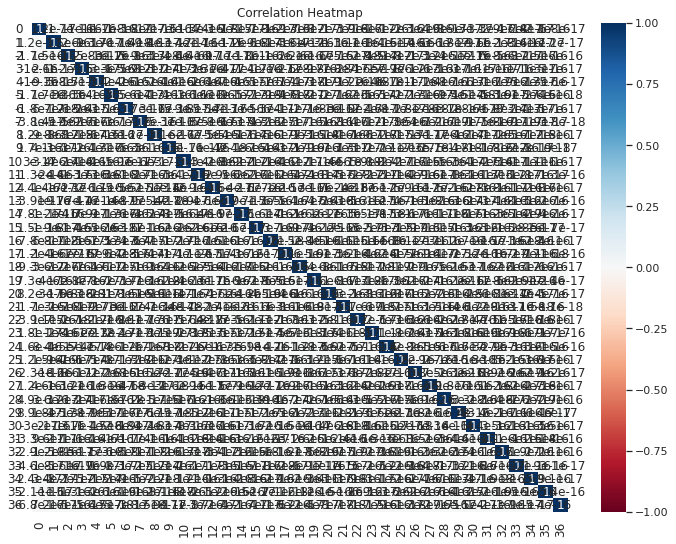

In [ ]:
plt.figure(figsize = (12, 9))
s = sns.heatmap(x_new.corr(),
               annot = True,
               cmap = 'RdBu',
               vmin = -1,
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

## Raw Data Visualization

Text(0.5, 1.0, 'Visualization of raw data')

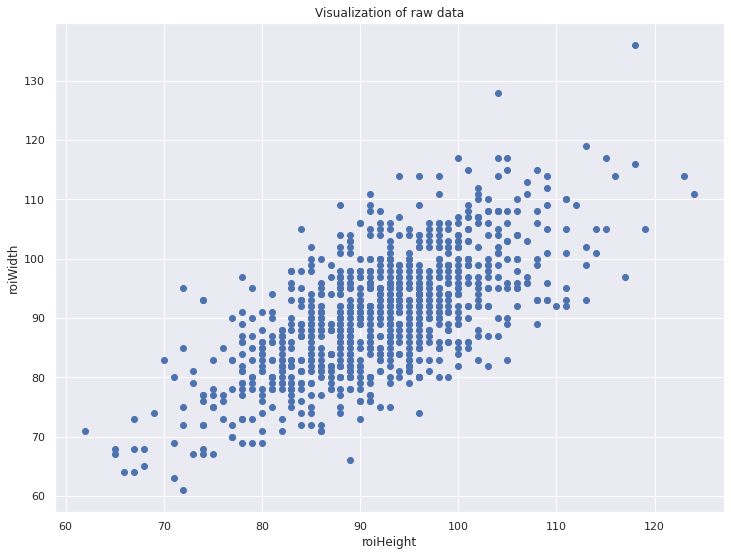

In [ ]:
plt.figure(figsize = (12, 9))
#plt.scatter(df_segmentation.iloc[:, 20], df_segmentation.iloc[:, 20])
plt.scatter(df_segmentation.iloc[:, 4], df_segmentation.iloc[:, 5])
plt.xlabel('roiHeight')
plt.ylabel('roiWidth')
plt.title('Visualization of raw data')

# ${\textbf{Standardization}}$

In [ ]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_segmentation)

# Classification
The major classes presented in the KneeMRI dataset are;  (1) healthy, (2) partially injured, or (3) completely ruptured. Here, various machine learning multi-classification model are trained to appropriately classify them and to also predict a class for a new patients. Various performance metric were used to access the models.

## Spilt data into training and testing
The dataset id first divided into training and testing sets, 75% and 25% respectively. The training set is used to train the model while the other is used to test the effectiveness of the model.

In [ ]:
features = ['kneeLR','roiX','roiY','roiZ','roiHeight','roiWidth','roiDepth']
X = df_segmentation.loc[:, features]
y = df_segmentation.loc[:, ['aclDiagnosis']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)

In [ ]:
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

In [ ]:
b = y_train.value_counts
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
c=y_train_res.value_counts

# Support vector classification

In [ ]:
model_svc = SVC()
model_svc.fit(X_train_res,y_train_res)
y_pred = model_svc.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:

print(accuracy_score(y_test, y_pred))

0.5173913043478261


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.57      0.67       174
           1       0.18      0.38      0.25        39
           2       0.18      0.29      0.22        17

    accuracy                           0.52       230
   macro avg       0.40      0.42      0.38       230
weighted avg       0.67      0.52      0.57       230



# Decision Tree Classification

In [ ]:

model_dt = DecisionTreeClassifier(class_weight = 'balanced', max_depth=5)
model_dt.fit(X_train_res,y_train_res)
y_pred = model_dt.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred))

0.5304347826086957


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.62      0.69       174
           1       0.18      0.21      0.19        39
           2       0.13      0.35      0.19        17

    accuracy                           0.53       230
   macro avg       0.36      0.39      0.36       230
weighted avg       0.62      0.53      0.57       230



# K-Nearest Neighbor classification

In [ ]:
model_knn = KNeighborsClassifier(3)
model_knn.fit(X_train_res,y_train_res)
y_pred = model_knn.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
print(accuracy_score(y_test, y_pred))

0.5521739130434783


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.60      0.70       174
           1       0.24      0.46      0.32        39
           2       0.13      0.24      0.17        17

    accuracy                           0.55       230
   macro avg       0.41      0.43      0.40       230
weighted avg       0.69      0.55      0.60       230



# Neural Network Classification

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[25, 25]),
    keras.layers.Dense(25, activation="relu"),
    keras.layers.Dense(25, activation="relu"),
    keras.layers.Dense(1, activation="softmax")
])
#print(model.summary())

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
#history = model.fit(X_train_res,y_train_res, epochs=100,
                    #validation_data=(X_test, y_test))


# Regression

In [ ]:
reg = DecisionTreeRegressor(max_depth = 2, random_state = 0)

In [ ]:
reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=0)

In [ ]:
reg.predict(X_test[0:10])

array([0.31208791, 0.11428571, 0.31208791, 0.11428571, 0.31208791,
       0.11428571, 0.31208791, 0.11428571, 0.31208791, 0.31208791])

In [ ]:
X_test.head(1)

,0,1,2,3,4,5,6
0,0.975553,-1.252338,0.113245,-0.026149,0.029882,0.937051,-0.487643


# Clustering

The data was then considered to have no labels to find out how many class of injury patients exist in the dataset. Clustering was employed for this study. It was observed from the two main clustering algorithms used that, there are foure classes of patients while the dataset originally present three classes.

# ${\textbf{Hierarchical Clustering}}$

In [ ]:
hier_clust = linkage(df_segmentation, method = 'ward')

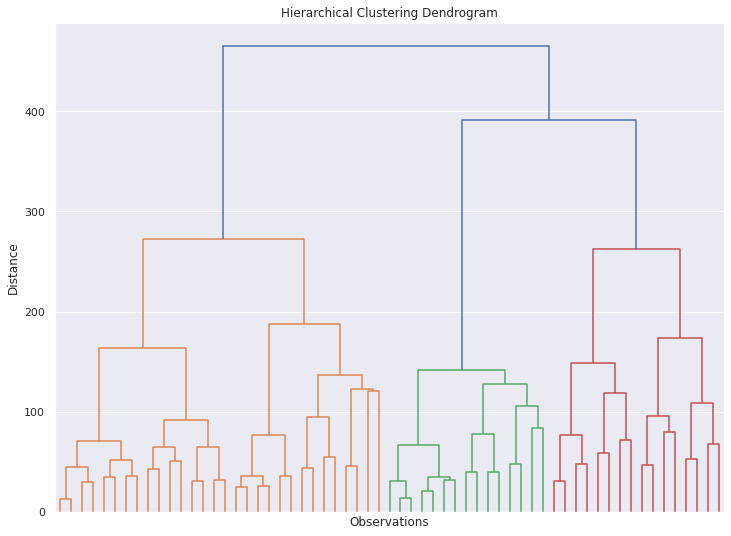

In [ ]:
plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
           truncate_mode = 'level',
           p = 5,
           show_leaf_counts = False,
           no_labels = True)
plt.show()

## ${\textbf{K-means Clustering}}$

In [ ]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x_new)
    wcss.append(kmeans.inertia_)

In [ ]:
wcss

[2104.6327187110555,
 2035.7861259432689,
 1984.633615851114,
 1921.095913048743,
 1872.158599344435,
 1811.5184178340432,
 1763.1810742339294,
 1689.5366139024195,
 1640.9393043218383,
 1590.3453156314363]

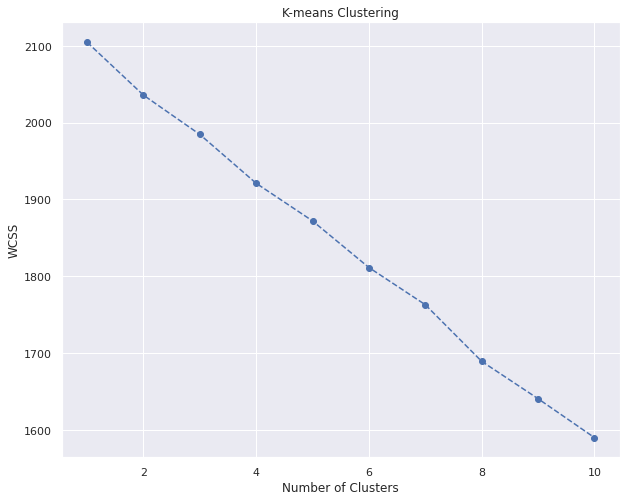

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)

In [ ]:
k_means_or=kmeans.fit(x_new)
k_means_or.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 2, 1], dtype=int32)

In [ ]:
df_segm_kmeans = df_segmentation.copy()
#df_segm_kmeans['Clusters'] = kmeans.labels_
df_segm_kmeans['Clusters'] = k_means_or
#plt.scatter(c=df_segm_analysis['Clusters'],cmap='rainbow')
#plt.scatter(df_segm_analysis['kneeLR'],df_segm_analysis['roiX'],df_segm_analysis['roiY'],df_segm_analysis['roiZ'],df_segm_analysis['roiHeight'],df_segm_analysis['roiWidth'],df_segm_analysis['roiDepth'],df_segm_analysis['aclDiagnosis'],cmap='rainbow')
df_segm_kmeans

NameError: ignored

In [ ]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis

In [ ]:
df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment K-means','0.1']].groupby(['Segment K-means']).count()
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs'] / df_segm_analysis['N Obs'].sum()

In [ ]:
df_segm_analysis

In [ ]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Clusters'],cmap='rainbow')
